In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy
import h5py
import matplotlib.pyplot as plt

# random seed for reproducibility
numpy.random.seed(2)

# loading load prima indians diabetes dataset, past 5 years of medical history
dataset = numpy.loadtxt("prima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables, splitting csv data
X = dataset[:, 0:8]
Y = dataset[:, 8]
x_train, x_validation, y_train, y_validation = train_test_split(
    X, Y, test_size=0.30, random_state=5)
# create model, add dense layers one by one specifying activation function
model = Sequential()
# input layer requires input_dim param
model.add(Dense(10, input_dim=8, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
# sigmoid instead of relu for final probability between 0 and 1
model.add(Dense(1, activation='sigmoid'))

# compile the model, adam gradient descent (optimized)
model.compile(loss="binary_crossentropy",
              optimizer="adam", metrics=['accuracy'])

# call the function to fit to the data (training the network)
model.fit(x_train, y_train, epochs=1000, batch_size=10,
          validation_data=(x_validation, y_validation))

# evaluate the model

scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))


model.save('diabetes_risk_nn.h5')


Epoch 1/1000
54/54 [==============================] - 2s 8ms/step - loss: 0.9787 - accuracy: 0.5475 - val_loss: 0.7540 - val_accuracy: 0.5887
Epoch 2/1000
54/54 [==============================] - 0s 5ms/step - loss: 0.6882 - accuracy: 0.6294 - val_loss: 0.6786 - val_accuracy: 0.6277
Epoch 3/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.6743 - accuracy: 0.6518 - val_loss: 0.6513 - val_accuracy: 0.6667
Epoch 4/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.6411 - accuracy: 0.6443 - val_loss: 0.6356 - val_accuracy: 0.6450
Epoch 5/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.6242 - accuracy: 0.6387 - val_loss: 0.6587 - val_accuracy: 0.6537
Epoch 6/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.6191 - accuracy: 0.6574 - val_loss: 0.6331 - val_accuracy: 0.6797
Epoch 7/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.6199 - accuracy: 0.6611 - val_loss: 0.6159 - val_accuracy: 0.6797
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.2197 - accuracy: 0.9088 - val_loss: 1.2151 - val_accuracy: 0.6753
Epoch 2/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.1915 - accuracy: 0.9255 - val_loss: 1.2130 - val_accuracy: 0.6926
Epoch 3/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.1565 - accuracy: 0.9348 - val_loss: 1.2500 - val_accuracy: 0.7056
Epoch 4/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.1393 - accuracy: 0.9404 - val_loss: 1.3350 - val_accuracy: 0.6667
Epoch 5/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1402 - accuracy: 0.9460 - val_loss: 1.3033 - val_accuracy: 0.6623
Epoch 6/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.1361 - accuracy: 0.9423 - val_loss: 1.2586 - val_accuracy: 0.6883
Epoch 7/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.1403 - accuracy: 0.9460 - val_loss: 1.3399 - val_accuracy: 0.6667
Epoch 

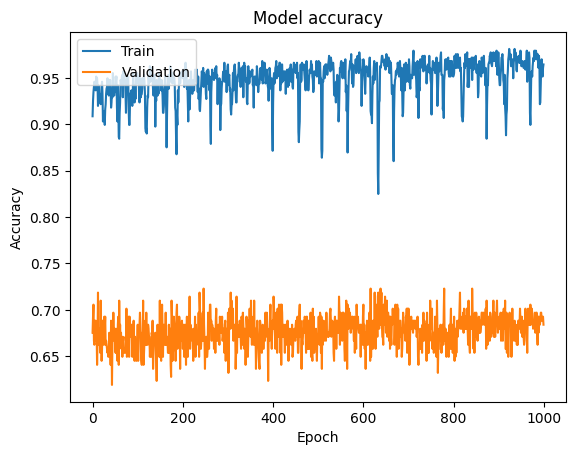

In [ ]:
history = model.fit(x_train, y_train, epochs=1000, batch_size=10,
                    validation_data=(x_validation, y_validation))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from keras.models import load_model
import numpy as np

model = load_model('diabetes_risk_nn.h5')


def pickthistodo():
    """Pick what needs to be done next."""
    global x
    dothis = input('''Would you like to enter more data:(y/n )''')
    if dothis == 'y' or dothis == 'y':
        x = 1
    elif dothis == 'n' or dothis == 'N':
        x = -1
    else:
        print("Your input is not valid please input 1, 2, or 3")
        pickthistodo()


x = 1
while x == 1:
    print("Please Enter the Folowing Metrics one at a time")
    a = float(input("Enter Metric 1: "))  #Number of times pregnant
    b = float(input("Enter Metric 2: "))  #Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    c = float(input("Enter Metric 3: "))  #Diastolic blood pressure (mm Hg)
    d = float(input("Enter Metric 4: "))  #Triceps skin fold thickness (mm)
    e = float(input("Enter Metric 5: "))  #2-Hour serum insulin (mu U/ml)
    f = float(input("Enter Metric 6: "))  #Body mass index (weight in kg/(height in m)^2)
    g = float(input("Enter Metric 7: "))  #Diabetes pedigree function
    h = float(input("Enter Metric 8: "))  #Age (years)


    makeprediction = np.array([a, b, c, d, e, f, g, h])
    makeprediction = makeprediction.reshape(1, -1)
    finalprediction = model.predict(makeprediction)
    print(finalprediction)
    pickthistodo()


Please Enter the Folowing Metrics one at a time
Enter Metric 1: 3
Enter Metric 2: 78
Enter Metric 3: 50
Enter Metric 4: 32
Enter Metric 5: 88
Enter Metric 6: 31
Enter Metric 7: 0.248
Enter Metric 8: 26
1/1 [==============================] - 0s 109ms/step
[[0.4035271]]
Would you like to enter more data:(y/n )n


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(x_validation)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_validation, y_pred_binary)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print other classification metrics
accuracy = accuracy_score(y_validation, y_pred_binary)
precision = precision_score(y_validation, y_pred_binary)
recall = recall_score(y_validation, y_pred_binary)
f1 = f1_score(y_validation, y_pred_binary)

print("\nAccuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

8/8 [==============================] - 0s 2ms/step
Confusion Matrix:
[[109  51]
 [ 26  45]]

Accuracy: 66.67%
Precision: 0.47
Recall: 0.63
F1 Score: 0.54
